In [1]:
%matplotlib inline
import sys
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import pylab as plt
import math
from itertools import chain
#import matplotlib.cm as cm
import statsmodels.api as sm
from os import listdir
import random
from copy import deepcopy
import time
import matplotlib.cm as cm
from numpy.random import choice
import itertools
import operator
import matplotlib.mlab as mlab
import re

## Burst Plot

### Load sci2 Burst Data

In [2]:
skills=[]
weight=[]
length=[]
start=[]
stop=[]
cat=[]

with open('job-pub-both-burst.txt','r', encoding ='latin') as f:
    for line in f:
        line=line.strip().split('\t')
        s = int(line[4])+1
        skills.append(line[0].lower().replace('_',' ').title())
        weight.append(line[1])
        start.append(line[3])
        stop.append(s)
        cat.append(line[5])
df = pd.DataFrame(
    {'skill': skills,
     'weight': weight,
     'start': start,
     'stop': stop,
     'type': cat
    })

df.start = df.start.astype(int)   
df.stop=df.stop.astype(int)
df.weight=df.weight.astype(float)
        

Make a subset of jobs and publications

In [3]:
dfjob = df[(df['type']=='job')]

In [4]:
dfpub = df[(df['type']=='pub')]

In [5]:
dfjob = dfjob.sort_values(ascending=False, by = 'skill' )
dfpub = dfpub.sort_values(ascending=False, by = 'skill' )
dfpub = dfpub.reset_index(drop=True)
dfjob = dfjob.reset_index(drop=True)

In [16]:

# Skills from jobs that occur more than once

repjob = dfjob.loc[[1,4,6,10,16]]
reppub = dfpub.loc[[13]]
repjob = repjob.reset_index(drop=True)
reppub = reppub.reset_index(drop=True)

In [7]:
dfjobsingle =dfjob.drop([1,4,6,10,16])
dfjobsingle=dfjobsingle.sort_values(ascending=False, by = 'skill' )
dfpubsingle =dfpub.drop(13)
dfpubsingle=dfpubsingle.sort_values(ascending=False, by = 'skill' )
dfpubsingle = dfpubsingle.reset_index(drop=True)
dfjobsingle = dfjobsingle.reset_index(drop=True)

In [17]:
reppub

,skill,start,stop,type,weight
0,Apache Hadoop,2016,2017,pub,7.519991


In [10]:
dfjobsingle

,skill,start,stop,type,weight
0,Web Analytics,2012,2014,job,69.190421
1,Storage Systems,2012,2014,job,15.202933
2,Social Media,2012,2014,job,27.600040
3,Social Gaming,2014,2015,job,12.913041
4,Maximo,2016,2017,job,17.262667
5,Marketing Analytics,2016,2017,job,68.995859
6,Industrial Engineering,2010,2012,job,3.672208
7,Hrms,2013,2015,job,2.885990
8,Facebook,2010,2014,job,383.553575
9,Environmental Science,2010,2013,job,7.209913


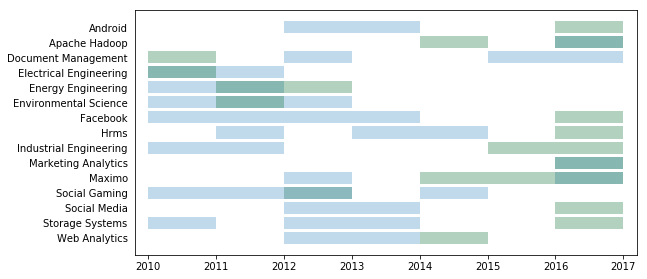

In [19]:

plt.rcParams['svg.fonttype'] = 'none'
fig = plt.figure(figsize=(9, 4.5),facecolor='white')
#end = np.array(df[['stop']])
ax1 = fig.add_subplot(111)
ax1.set_xlim((2009.8, 2017.2))
ax1.barh(range(len(dfjobsingle.start)),  dfjobsingle.stop-dfjobsingle.start, left=dfjobsingle.start, color="#3182bd",alpha=0.3)
ax1.barh(range(len(dfpubsingle.start)),  dfpubsingle.stop-dfpubsingle.start, left=dfpubsingle.start, color="#006d2c", alpha=0.3)
ax1.barh([1,3,4,7,12],  repjob.stop-repjob.start, left=repjob.start, color="#3182bd", alpha=0.3)
ax1.barh(13,  reppub.stop-reppub.start, left=reppub.start, color="#006d2c", alpha=0.3)
ax1.yaxis.set_ticks_position('none')

my_yticks=dfjobsingle.skill
y = list(range(0, 16))

plt.yticks(y, my_yticks)
#plt.savefig('Fig4-burst-job-pub-06-26.png')
#plt.savefig('Fig4-burst-job-pub-06-26.svg')
plt.show()